In [35]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout,BatchNormalization

In [3]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
y_test.shape

(10000,)

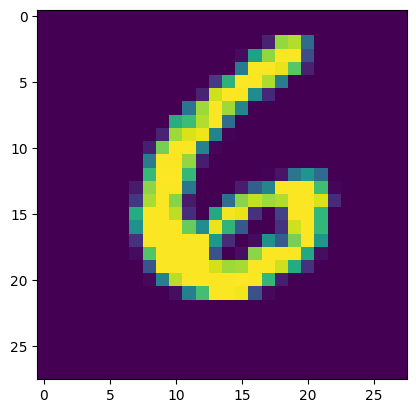

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[90])

In [8]:
X_train= X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

In [9]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
X_train, X_val = X_train[:-10000], X_train[-10000:]
y_train, y_val = y_train[:-10000], y_train[-10000:]

In [11]:
X_train.shape

(50000, 28, 28, 1)

In [12]:
y_train

array([5, 0, 4, ..., 8, 4, 8], dtype=uint8)

In [13]:

# Build a simple CNN model with regularization
model = Sequential()

# Add layers to the model
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [16]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer, metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.8957 - loss: 0.3627 - val_accuracy: 0.9790 - val_loss: 0.0723
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.9832 - loss: 0.0552 - val_accuracy: 0.9859 - val_loss: 0.0495
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.9891 - loss: 0.0360 - val_accuracy: 0.9889 - val_loss: 0.0381
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9916 - loss: 0.0247 - val_accuracy: 0.9896 - val_loss: 0.0384
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9936 - loss: 0.0190 - val_accuracy: 0.9894 - val_loss: 0.0389
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9880 - val_loss: 0.0468
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 31ms/step - accuracy: 0.9960 - loss: 0.0108 - val_accuracy: 0.9885 - val_loss: 0.0464
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9974 -

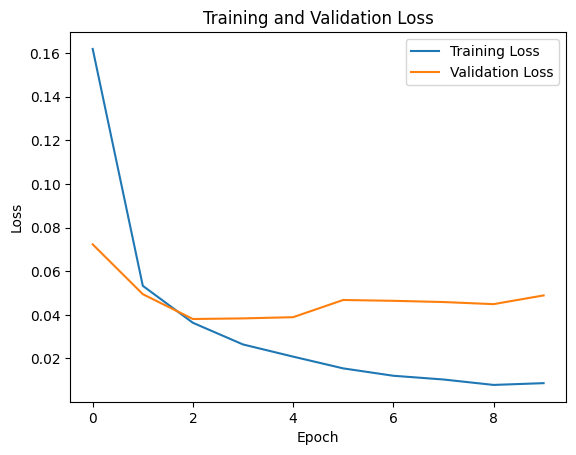

In [18]:
#history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [19]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9895 - loss: 0.0402
Test Accuracy: 99.18%


Batch Noramlization and its usage:

Code after applying drop out layer

In [21]:
X_train


array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [26]:
model_with_drop_out = Sequential()

# Input and first convolutional layer
model_with_drop_out.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_with_drop_out.add(MaxPooling2D((2, 2)))


model_with_drop_out.add(Dropout(0.25))

# Second convolutional layer
model_with_drop_out.add(Conv2D(64, (3, 3), activation='relu'))
model_with_drop_out.add(MaxPooling2D((2, 2)))

model_with_drop_out.add(Dropout(0.25))

model_with_drop_out.add(Flatten())


model_with_drop_out.add(Dense(64, activation='relu'))
model_with_drop_out.add(Dropout(0.5))


model_with_drop_out.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [28]:
model_with_drop_out.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer, metrics=['accuracy'])

In [29]:
history_with_dropout = model_with_drop_out.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 40ms/step - accuracy: 0.7611 - loss: 0.7232 - val_accuracy: 0.9759 - val_loss: 0.0815
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.9425 - loss: 0.1841 - val_accuracy: 0.9832 - val_loss: 0.0559
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9616 - loss: 0.1337 - val_accuracy: 0.9876 - val_loss: 0.0437
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9654 - loss: 0.1131 - val_accuracy: 0.9879 - val_loss: 0.0419
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 35ms/step - accuracy: 0.9689 - loss: 0.0972 - val_accuracy: 0.9897 - val_loss: 0.0363
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9735 - loss: 0.0851 - val_accuracy: 0.9897 - val_loss: 0.0400
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9747 - loss: 0.0823 - val_accuracy: 0.9902 - val_loss: 0.0382
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 54s 35ms/step - accuracy: 0.9767 -

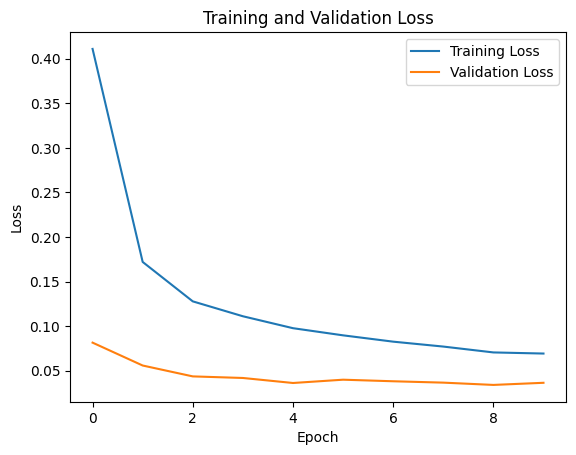

In [32]:
import matplotlib.pyplot as plt

plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with drop out layer')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [33]:
test_loss, test_accuracy = model_with_drop_out.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9899 - loss: 0.0323
Test Accuracy: 99.17%


In [37]:
model_with_BN = Sequential()

# Add layers to the model
model_with_BN.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_with_BN.add(BatchNormalization())
model_with_BN.add(MaxPooling2D((2, 2)))
model_with_BN.add(Conv2D(64, (3, 3), activation='relu'))
model_with_BN.add(BatchNormalization())
model_with_BN.add(MaxPooling2D((2, 2)))
model_with_BN.add(Flatten())
model_with_BN.add(Dense(64, activation='relu'))
model_with_BN.add(BatchNormalization())
model_with_BN.add(Dense(10, activation='softmax'))

In [38]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001)

In [39]:
model_with_BN.compile(loss = "sparse_categorical_crossentropy",optimizer = optimizer, metrics=['accuracy'])

In [40]:
history_with_BN = model_with_BN.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 56ms/step - accuracy: 0.9294 - loss: 0.2394 - val_accuracy: 0.9877 - val_loss: 0.0425
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 45ms/step - accuracy: 0.9879 - loss: 0.0431 - val_accuracy: 0.9873 - val_loss: 0.0430
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.9911 - loss: 0.0291 - val_accuracy: 0.9876 - val_loss: 0.0440
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9924 - loss: 0.0226 - val_accuracy: 0.9889 - val_loss: 0.0410
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 45ms/step - accuracy: 0.9943 - loss: 0.0189 - val_accuracy: 0.9892 - val_loss: 0.0363
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9952 - loss: 0.0147 - val_accuracy: 0.9894 - val_loss: 0.0376
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 44ms/step - accuracy: 0.9964 - loss: 0.0114 - val_accuracy: 0.9902 - val_loss: 0.0394
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 72s 46ms/step - accuracy: 0.9972 -

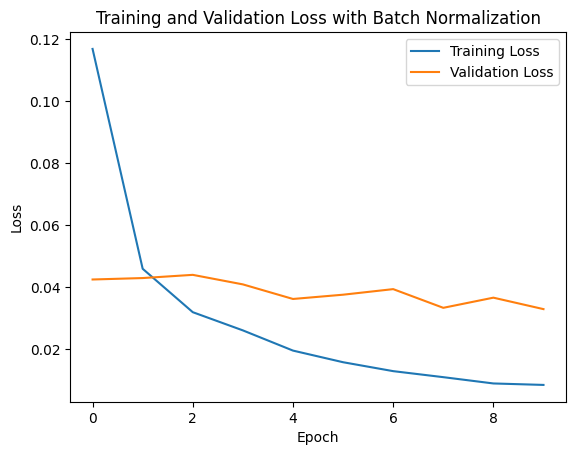

In [41]:
import matplotlib.pyplot as plt

plt.plot(history_with_BN.history['loss'], label='Training Loss')
plt.plot(history_with_BN.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with Batch Normalization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [42]:
test_loss, test_accuracy = model_with_BN.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9893 - loss: 0.0361
Test Accuracy: 99.10%


Batch Noramlization and its usage:

Batch normalization is a technique which makes deep learning training more faster and stable. It consists of normalizing activation vectors from hidden layers using the mean and variance of the current batch. This is applied right before or after the nonlinear function

Drop out layer and its usage:

Dropout layer is a technique used to reduce overfitting of the model by dropping of some neurons randomly from hidden layer to avoid overfitting

In [42]:
Inferences:

I have trained the model without dropout layer, later with dropout layer and batch normalization layer.

observations:

1) Adding drop out layer doesnot make any significant change in the output and test accuracy is almost same i.e 99.17. Additionallly training loss is initially higher in model with drop out compared with model without drop out layer

overfitting is not a concern, as test accuracy is same in both cases

2) Model trained with Batch Normalization significantly improves the model's performance by normalizing the inputs at each layer, which helps in stabilizing the training process. This is evident from the consistently lower training and validation losses compared to models without it. Such normalization reduces drastic shifts in input distribution—a common problem in deep networks—making training faster and more reliable. The close tracking of training and validation losses indicates that the model generalizes well and doesn't overfit, making Batch Normalization a highly effective strategy for enhancing neural network performance.

Model requires batch processing layer and doesnt require drop out based on the observations